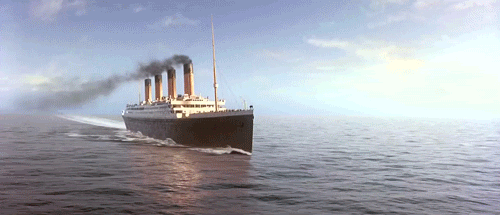

Lets dive into ***Titanic*** dataset...:)

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
#Data Preprocessing - filling NaN Values
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)
test['Fare'] = test['Fare'].fillna(0)

In [4]:
# Adding new column
txt = np.vectorize((lambda x, y:1 if x.find(y) > -1 else 0))
train['New_Data'] = txt(train['Name'], 'New_one')
test['New_Data'] = txt(test['Name'], 'New_one')

In [5]:
# convert text into numbers
features = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).columns.values.tolist()
features.insert(2, features[-1])
train_df = pd.get_dummies(train[features[:-1]])
test_df = pd.get_dummies(test[features[:-1]])

In [6]:
# Need dependent and independent val
x = train_df.values
y = train['Survived'].values
x_submission = test_df.values

In [7]:
# divide data by using train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, shuffle= False, random_state=1)

In [8]:
# Model training 
model = RandomForestClassifier(max_depth = 5, random_state=1).fit(x_tr, y_tr)
y_final = model.predict(x_submission)

In [9]:
final_male_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_final})[test['Sex'] == 'male']
final_female_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_final})[test['Sex'] == 'female']

In [10]:
final_combine_df = pd.concat([final_male_df, final_female_df], axis=0)
final_combine_df.to_csv('submission.csv', index=False)

Hope you like my work...Post your comments for any suggestion that makes me keep growing>>:).......

......**Thanks**....!!!